In [1]:
#Carregando principais bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import treecorr as tr


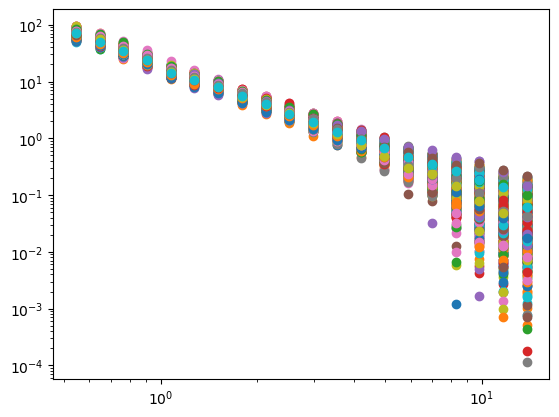

In [2]:
#Importando os catálogos mock

N = 1000 

for i in range(N):
    
    data = tr.Catalog('mocks_cut/mock_'+str(i)+'.dat', 
                      x_col='x', y_col='y', z_col='z')
    
    #Importando o catálogo aleatório

    rand = tr.Catalog('random.dat', x_col='x', y_col='y', z_col='z')

    dd = tr.NNCorrelation(min_sep=0.5, max_sep=15., nbins=20)
    dd.process(data)
    
    rr = tr.NNCorrelation(min_sep=0.5, max_sep=15., nbins=20)
    rr.process(rand)
    
    dr = tr.NNCorrelation(min_sep=0.5, max_sep=15., nbins=20)
    dr.process(data, rand)

    r = dd.rnom

    #Contando numero de pares 
    DD = dr.npairs

    #Calculo da função de correlação
    xi, varxi = dd.calculateXi(rr=rr, dr=dr)

    #Salvando os resultados
    
    S1 = r, xi

    plt.loglog()
    plt.scatter(r, xi)
    
    np.savetxt('xi/xi_'+str(i)+'.dat', np.transpose(S1), delimiter='\t')
    

